In [1]:
import pandas as pd
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

In [2]:
data = pd.read_csv('txt/0_AC Measurements_1-12-2018_10-35-59 PM.txt', sep="\t", header=None)
data.head()

,0,1,2,3,4,5,6
0,Time stamp,NaN,Bx,NaN,By,NaN,Bz
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/12/2018 22:35:58:.987,0.002604,0.022614,-0.007113,NaN,NaN,NaN
3,1/12/2018 22:35:58:.987,0.003369,0.018865,-0.002312,NaN,NaN,NaN
4,1/12/2018 22:35:58:.987,0.005060,0.013827,0.002952,NaN,NaN,NaN


In [5]:
print('There are '+str(len(data)-3)+' number of Test points\n')
len_input = int(input("How many points you want to plot"))
data_2=data.iloc[2:len_input+2,[1,2,3]].copy(deep=False).reset_index(drop=True).apply(pd.to_numeric)
#By is object
data_2.columns = ["Bx", "By", "Bz"]
print(data_2.head())
data2_len = len(data_2)
print('\nThis test has points of:'+ str(data2_len) )
x_values =  np.linspace(0,data2_len*0.00002,data2_len,endpoint=False)

There are 75212 number of Test points

How many points you want to plot60000
         Bx        By        Bz
0  0.002604  0.022614 -0.007113
1  0.003369  0.018865 -0.002312
2  0.005060  0.013827  0.002952
3  0.007644  0.007838  0.008696
4  0.010943  0.001434  0.014697

This test has points of:60000


C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:48: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


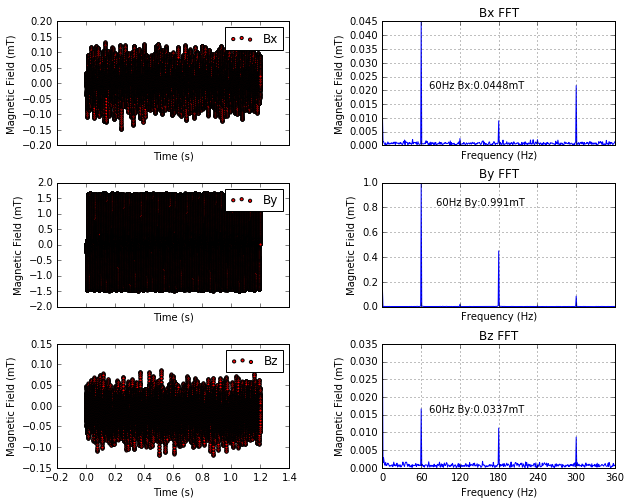

In [7]:
fig, axarr = plt.subplots(3,2, sharex='col',figsize=(10,8))
#fig.tight_layout()
#fig.tight_layout(pad=1.5, h_pad=1.2, w_pad=1.2, rect=None)
plt.subplots_adjust(hspace = 0.3,wspace = 0.4)
axarr[0,0].scatter(x_values,data_2['Bx'],s=10, c='red')
axarr[0,0].set(ylabel='Magnetic Field (mT)',xlabel='Time (s)')
axarr[0,0].legend(loc='best')
axarr[1,0].scatter(x_values,data_2['By'],s=10, c='red')
axarr[1,0].set(ylabel='Magnetic Field (mT)',xlabel='Time (s)')
axarr[1,0].legend(loc='best')
axarr[2,0].scatter(x_values,data_2['Bz'],s=10, c='red')
axarr[2,0].set(ylabel='Magnetic Field (mT)',xlabel='Time (s)')
axarr[2,0].legend(loc='best')
f = np.linspace(0.0, 1.0/(2.0*1/50000), data2_len/2)

Bxfft=2.0/data2_len * np.abs(scipy.fftpack.fft(data_2['Bx'])[:data2_len//2])
axarr[0,1].plot(f, Bxfft)
axarr[0,1].set_xlim(0,360)
axarr[0,1].xaxis.set(ticks=[0,60,120,180,240,300,360],ticklabels=[0,60,120,180,240,300,360])
axarr[0,1].set(ylabel='Magnetic Field (mT)',xlabel='Frequency (Hz)')
axarr[0,1].set_title('Bx FFT')
axarr[0,1].grid()
ymax_Bxfft = max(Bxfft)
xpos_Bxfft = Bxfft.argmax(ymax_Bxfft)
xmax_Bxfft = f[xpos_Bxfft]
axarr[0,1].text(220, 0.02,str(format(xmax_Bxfft,'.3g'))+'Hz Bx:'+str(format(ymax_Bxfft,'.3g'))+'mT',verticalalignment='bottom', horizontalalignment='right',)
            


Byfft=2.0/data2_len * np.abs(scipy.fftpack.fft(data_2['By'])[:data2_len//2])
axarr[1,1].plot(f, Byfft)
axarr[1,1].set(ylabel='Magnetic Field (mT)',xlabel='Frequency (Hz)')
axarr[1,1].set_title('By FFT')
axarr[1,1].grid()
ymax_Byfft = max(Byfft)
xpos_Byfft = Byfft.argmax(ymax_Byfft)
xmax_Byfft = f[xpos_Byfft]
axarr[1,1].text(220, 0.8,str(format(xmax_Byfft,'.3g'))+'Hz By:'+str(format(ymax_Byfft,'.3g'))+'mT',verticalalignment='bottom', horizontalalignment='right',)
   


Bzfft=2.0/data2_len * np.abs(scipy.fftpack.fft(data_2['Bz'])[:data2_len//2])
axarr[2,1].plot(f,Bzfft)
axarr[2,1].set_title('Bz FFT')
axarr[2,1].set(ylabel='Magnetic Field (mT)',xlabel='Frequency (Hz)')
axarr[2,1].grid()
ymax_Bzfft = max(Bzfft)
xpos_Bzfft = Byfft.argmax(ymax_Bzfft)
xmax_Bzfft = f[xpos_Bzfft]
axarr[2,1].text(220, 0.015,str(format(xmax_Bzfft,'.3g'))+'Hz By:'+str(format(ymax_Bzfft,'.3g'))+'mT',verticalalignment='bottom', horizontalalignment='right',)
   

In [ ]:
#Example Plot
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()